In [31]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import pandas_datareader.data as web

from time import sleep

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import urllib
from datetime import date , timedelta

In [32]:
def color_negative_red(value):
    """
      Colors elements in a dateframe
      green if positive and red if
      negative. Does not color NaN
      values.
      """

    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

# Macro Analysis

To Do
- Economic Quadrant
- Econmic Quadrant with Rate of Change
- M2 growth
- M2 Acceleration
- 10Y bond yield rate of change
- Include Qualtiles of all
- Present in a nice format
- economic policy
-  Sentiment (TED spread, )

In [33]:
GDP_tmp = web.DataReader('GDPC1','fred', '1970-01-01') #Quaterly
CPI_tmp = web.DataReader('CPIAUCSL','fred', '1970-01-01') # Monthly
yield10_tmp = web.DataReader('DGS10','fred', '1970-01-01') # Daily
M2_tmp = web.DataReader('M2','fred', '1970-01-01') # Weekly
yield2_tmp = web.DataReader('DGS2','fred', '1970-01-01') # Daily

### Growth YoY

In [34]:
GDP_Change = GDP_tmp.pct_change(4) 
CPI_Change = CPI_tmp.pct_change(12)
yield2_change = yield2_tmp.pct_change(252)

In [35]:
Growth_Data = pd.concat([GDP_Change, CPI_Change],axis =1)
Growth_Data.columns = ["GDP", "CPI"]
Growth_Data = Growth_Data.dropna()

Growth_Data.index = Growth_Data.index.to_period('Q')

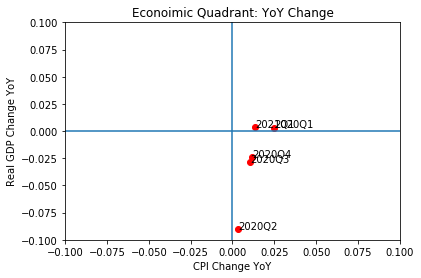

In [36]:
n=5
plt.scatter(Growth_Data["CPI"].tail(n), Growth_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change YoY")
plt.xlabel("CPI Change YoY")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

for i, txt in enumerate(Growth_Data["CPI"].tail(n).index):
    plt.annotate(txt, (Growth_Data["CPI"].tail(n)[i], Growth_Data["GDP"].tail(n)[i]))
    
plt.title('Econoimic Quadrant: YoY Change');

### Rate of Change YoY

In [37]:
GDP_RC = GDP_tmp.pct_change(4).pct_change(4) 
CPI_RC = CPI_tmp.pct_change(12).pct_change(12)


RC_Data = pd.concat([GDP_RC, CPI_RC, yield2_change],axis =1)
RC_Data.columns = ["GDP", "CPI", '2 Year Yield']
RC_Data = RC_Data.dropna()

RC_Data.index = RC_Data.index.to_period('Q')

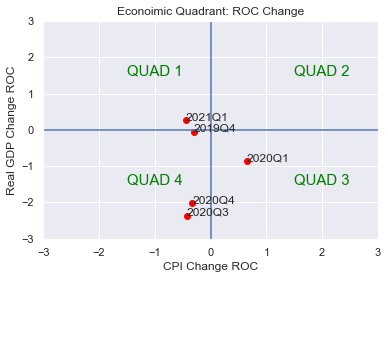

In [38]:
n=6
lim = 3
sns.set()
plt.scatter(RC_Data["CPI"].tail(n), RC_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change ROC")
plt.xlabel("CPI Change ROC")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for i, txt in enumerate(RC_Data["CPI"].tail(n).index):
    plt.annotate(txt, (RC_Data["CPI"].tail(n)[i], RC_Data["GDP"].tail(n)[i]))

plt.text(-lim/2, lim/2, r'QUAD 1', fontsize=15, color='green')
plt.text(lim/2, lim/2, r'QUAD 2', fontsize=15, color='green')
plt.text(lim/2, -lim/2, r'QUAD 3', fontsize=15, color='green')
plt.text(-lim/2, -lim/2, r'QUAD 4', fontsize=15, color='green')
    
plt.title('Econoimic Quadrant: ROC Change');

## Dashboard

In [39]:
macro_dash = RC_Data.tail(5)
th_props = [
  ('font-size', '16px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'Black'),
  ('background-color', '#f7f7f9')
  ]


# Set CSS properties for td elements in dataframe
td_props = [('font-size', '16px'), ('text-align', 'center')]

# Set table styles
styles = [
    dict(selector="th", props=th_props),
    dict(selector="td", props=td_props)
]

cm_low_good = sns.diverging_palette(150, 10, s=80, l=70, n=len(macro_dash.columns), as_cmap=True)#sns.light_palette("green", as_cmap=True)
cm_high_good = sns.diverging_palette(10, 150, s=80, l=70, n=len(macro_dash.columns), as_cmap=True)

macro_dash_VIEW = (macro_dash.style
    .applymap(color_negative_red, subset=['GDP', 'CPI', '2 Year Yield'])
    #.background_gradient(axis = 0 ,subset = ['DSSP', 'HIDI'],cmap=cm_high_good)
    #.background_gradient(axis = 0 ,subset = ['VRANK', 'MRANK','CRANK', 'ST'],cmap=cm_low_good)
    #.set_caption('Performance Metrics')
    .format({'GDP': "{:.2f}",'CPI': "{:.2f}", '2 Year Yield': "{:.1%}"})
    .set_table_styles(styles))

In [40]:
macro_dash_VIEW

,GDP,CPI,2 Year Yield
DATE,,,
2020Q1,-0.86,0.65,-37.5%
2020Q2,-5.60,-0.83,-90.4%
2020Q3,-2.37,-0.43,-90.7%
2020Q4,-2.02,-0.33,-91.3%
2021Q1,0.26,-0.45,-91.7%


# Rolling Correlation Estimation
- SPY
- Gold
- IEF (10 Yr Bond)
- TIPS

In [41]:
spy_tmp = yf.download('SPY') 
gld_tmp = yf.download('GLD') 
ief_tmp = yf.download('IEF') 
tips_tmp = yf.download('TIP') 
dbc_tmp = yf.download('DBC')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
spy = spy_tmp['Close']
gld = gld_tmp['Close']
ief = ief_tmp['Close']
tips = tips_tmp['Close']
dbc = dbc_tmp['Close']

In [50]:
corr_data = pd.concat([spy, gld, ief, tips, dbc],axis =1)
corr_data.columns = ['SP500', 'Gold', '10Yr Bonds', 'TIPS', 'Commodities']

corr_data_3yr = corr_data.pct_change(1).tail(5*252)
corr_matrix = corr_data_3yr.corr(method = 'spearman')
corr_matrix

,SP500,Gold,10Yr Bonds,TIPS,Commodities
SP500,1.000000,-0.027990,-0.318382,-0.091907,0.350411
Gold,-0.027990,1.000000,0.449214,0.470055,0.162910
10Yr Bonds,-0.318382,0.449214,1.000000,0.773568,-0.170749
TIPS,-0.091907,0.470055,0.773568,1.000000,0.084861
Commodities,0.350411,0.162910,-0.170749,0.084861,1.000000


## High Yield Spread and Yield Curve

Use above/below 10 year median for signal for growth and inflation



In [47]:
# Import Data
HY_spread_tmp = web.DataReader('BAMLH0A0HYM2','fred', '1970-01-01') #Quaterly
yiedl_10_2_tmp = web.DataReader('T10Y2Y','fred', '1970-01-01')

In [48]:
HY_spread = HY_spread_tmp[-10*252:]
yiedl_10_2 = yiedl_10_2_tmp[-10*252:]

HY_spread_ecdf = ECDF(HY_spread['BAMLH0A0HYM2'])
yiedl_10_2_ecdf = ECDF(yiedl_10_2['T10Y2Y'])

HY_spread_current = HY_spread_ecdf(HY_spread[-1:])
yiedl_10_2_current = yiedl_10_2_ecdf(yiedl_10_2[-1:])



macro_percentile = pd.concat([pd.DataFrame(HY_spread_current), pd.DataFrame(yiedl_10_2_current)],axis =1)
macro_percentile.columns = ["High Yield Spread", "Yield Curve"]

In [49]:
macro_percentile

,High Yield Spread,Yield Curve
0,0.03254,0.67619


In [53]:
percentile_dash = macro_percentile
th_props = [
  ('font-size', '16px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'Black'),
  ('background-color', '#f7f7f9')
  ]


# Set CSS properties for td elements in dataframe
td_props = [('font-size', '16px'), ('text-align', 'center')]

# Set table styles
styles = [
    dict(selector="th", props=th_props),
    dict(selector="td", props=td_props)
]

cm_low_good = sns.diverging_palette(150, 10, s=80, l=70, n=len(macro_dash.columns), as_cmap=True)#sns.light_palette("green", as_cmap=True)
cm_high_good = sns.diverging_palette(10, 150, s=80, l=70, n=len(macro_dash.columns), as_cmap=True)

percentile_dash_VIEW = (percentile_dash.style
    #.applymap(color_negative_red, subset=['GDP', 'CPI', '2 Year Yield'])
    #.background_gradient(axis = 0 ,subset = ['DSSP', 'HIDI'],cmap=cm_high_good)
    #.background_gradient(axis = 0 ,subset = ['VRANK', 'MRANK','CRANK', 'ST'],cmap=cm_low_good)
    #.set_caption('Performance Metrics')
    .format({'High Yield Spread': "{:.1%}",'Yield Curve': "{:.1%}"})
    .set_table_styles(styles))

In [54]:
macro_dash_VIEW

,High Yield Spread,Yield Curve
0,3.3%,67.6%
